1. Carga el dataset de Titanic
2. Ahora analizaremos más generalmente el dataset:
a. Cuantos NA hay en el dataset y en que columnas?
b. Que nos dice la variable SibSp y Parch? Cómo se distribuyen estas variables?
c. Estudia la función countplot del paquete seaborn. Haz un countplots utilizando
las columnas Pclass y Sex.
d. Haz un histograma de la variable Age
e. Qué columnas se podrían descartar “en principio” de un modelo solo con
observar que significan?
f. La columna Cabin tiene muchos missings, con que podría tener relación esta
columna? Crea una columna para decir si esta variable está informada. Haz un
‘group by’ con esta columna junto a otras variables para encontrar alguna posible
relación.
g. Mira las relaciones que puede tener Embarked con Survived.
3. Ahora vamos a ajustar modelos logístico a partir de las columnas :
'Survived','Pclass','Sex','Age','SibSp','Parch','Fare'.
a. En las filas donde Age sea NA introduce la media total.
b. Transforma la columna Pclass, Sex en strings.
c. Convierte Pclass, Sex en dummies. Quita las columnas que escojas como
variables base.
d. Ajusta un modelo Logístico con todas las variables.
e. Que Accuracy?
f. Dibuja la curva ROC y calcula el AUC.
g. Obten la confusion matrix. Haz un plot de ella.
h. Observa los p-valores del modelo? Que variables podríamos descartar?
i. Reentrena el modelo sin las columnas no significativas. Vuelve a obtener todas
las métricas del modelo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [2]:
df=pd.read_csv("train_titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Ahora analizaremos más generalmente el dataset:

a. Cuantos NA hay en el dataset y en que columnas?

b. Que nos dice la variable SibSp y Parch? Cómo se distribuyen estas variables?

c. Estudia la función countplot del paquete seaborn. Haz un countplots utilizando
las columnas Pclass y Sex.

d. Haz un histograma de la variable Age

e. Qué columnas se podrían descartar “en principio” de un modelo solo con
observar que significan?

f. La columna Cabin tiene muchos missings, con que podría tener relación esta
columna? Crea una columna para decir si esta variable está informada. Haz un
‘group by’ con esta columna junto a otras variables para encontrar alguna posible
relación.

g. Mira las relaciones que puede tener Embarked con Survived.

In [3]:
# a)
df.isnull().sum()
# en Age, Caebin y Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# b)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


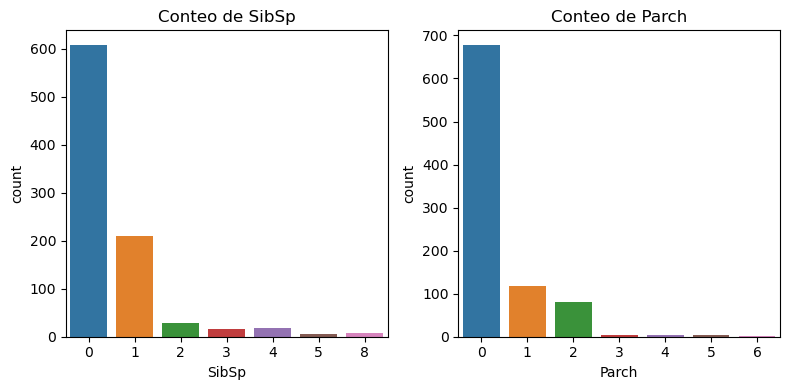

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(8,4))

# Creamos el primer gráfico de barras para 'SibSp'
sns.countplot(ax=axes[0], x="SibSp", data=df)
axes[0].set_title('Conteo de SibSp')

# Creamos el segundo gráfico de barras para 'Parch'
sns.countplot(ax=axes[1], x="Parch", data=df)
axes[1].set_title('Conteo de Parch')

# Mostramos los gráficos
plt.tight_layout()
plt.show()

In [6]:
# SibSp, nos muestra el nuemro de hermanos con los que vaija el pasajero
# Parch, nos muestra el numero de padres/hijos con los que viaja el pasajero 
# distribución con sesgo positivo

c. Estudia la función countplot del paquete seaborn. Haz un countplots utilizando
las columnas Pclass y Sex.

d. Haz un histograma de la variable Age

e. Qué columnas se podrían descartar “en principio” de un modelo solo con
observar que significan?

f. La columna Cabin tiene muchos missings, con que podría tener relación esta
columna? Crea una columna para decir si esta variable está informada. Haz un
‘group by’ con esta columna junto a otras variables para encontrar alguna posible
relación.

g. Mira las relaciones que puede tener Embarked con Survived.

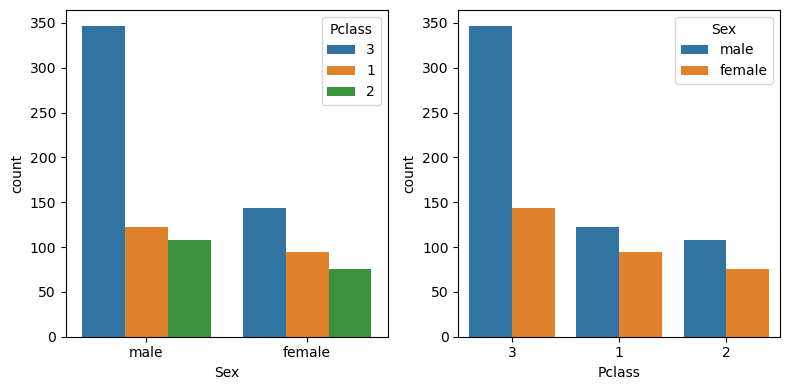

In [7]:
# c)
df2c = df.copy()
df2c['Pclass'] = df2c['Pclass'].astype(str)
df2c['Sex'] = df2c['Sex'].astype(str)
fig, axes = plt.subplots(1, 2, figsize=(8,4))

sns.countplot(ax=axes[0], x="Sex", hue="Pclass", data=df2c)


sns.countplot(ax=axes[1], x="Pclass", hue="Sex", data=df2c)

plt.tight_layout()
plt.show()

e:\Apps\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

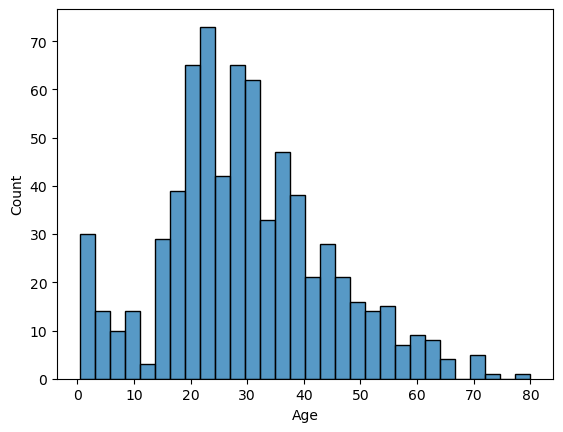

In [8]:
# d)
sns.histplot(data=df, x="Age", bins=30)

In [9]:
# e)
df2e = df.copy()
df2e.info()
df2e.isnull().sum()
df2e.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# yo eliminaria: SibSp, Parch, Embarked, Cabin, ticket

f. La columna Cabin tiene muchos missings, con que podría tener relación esta
columna? Crea una columna para decir si esta variable está informada. Haz un
‘group by’ con esta columna junto a otras variables para encontrar alguna posible
relación.

g. Mira las relaciones que puede tener Embarked con Survived.



In [11]:
# f) tiene muchos missing por que si no tenian cabina no se le asignaba ningun valor
df2f = df.copy()
df2f["Cabin_int"] = df2f['Cabin'].notnull().astype(int)
df2f.Cabin_int.value_counts()

Cabin_int
0    687
1    204
Name: count, dtype: int64

In [12]:
df2f_group = df2f.groupby(["Cabin_int", "Pclass"])
df2f_group.size()

Cabin_int  Pclass
0          1          40
           2         168
           3         479
1          1         176
           2          16
           3          12
dtype: int64

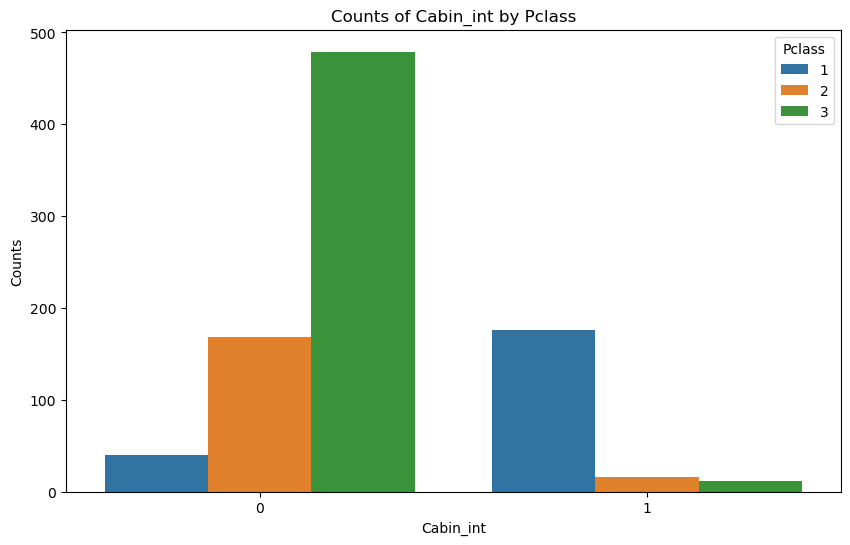

In [13]:
df2f_group = df2f.groupby(["Cabin_int", "Pclass"]).size().reset_index(name='counts')

df2f_group['Cabin_int'] = df2f_group['Cabin_int'].astype(str)
df2f_group['Pclass'] = df2f_group['Pclass'].astype(str)

plt.figure(figsize=(10, 6))
sns.barplot(x='Cabin_int', y='counts', hue='Pclass', data=df2f_group)

plt.xlabel('Cabin_int')
plt.ylabel('Counts')
plt.title('Counts of Cabin_int by Pclass')
plt.show()

<Axes: xlabel='Embarked', ylabel='count'>

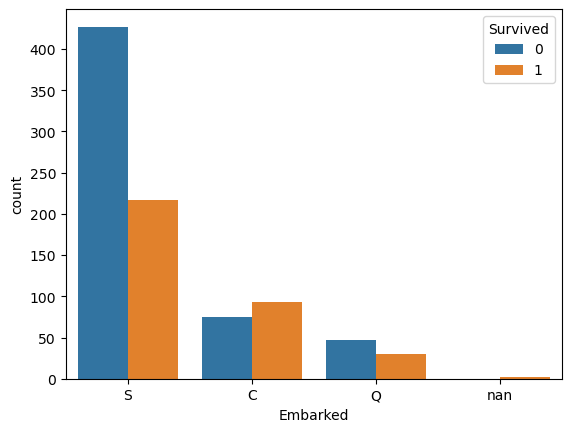

In [14]:
# g) Mira las relaciones que puede tener Embarked con Survived.

df2g = df.copy()

df2g['Embarked'] = df2g['Embarked'].astype(str)
df2g['Survived'] = df2g['Survived'].astype(str)

sns.countplot( x="Embarked", hue="Survived", data=df2g, )


3. Ahora vamos a ajustar modelos logístico a partir de las columnas :
'Survived','Pclass','Sex','Age','SibSp','Parch','Fare'.

a. En las filas donde Age sea NA introduce la media total.

b. Transforma la columna Pclass, Sex en strings.

c. Convierte Pclass, Sex en dummies. Quita las columnas que escojas como
variables base.

d. Ajusta un modelo Logístico con todas las variables.

e. Que Accuracy?

f. Dibuja la curva ROC y calcula el AUC.

g. Obten la confusion matrix. Haz un plot de ella.

h. Observa los p-valores del modelo? Que variables podríamos descartar?

i. Reentrena el modelo sin las columnas no significativas. Vuelve a obtener todas
las métricas del modelo.

In [15]:
# a)
df3 = df.copy()
df3 = df3[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
df3['Age'] = df3['Age'].fillna(df3['Age'].mean())

In [16]:
df3.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [17]:
# b)
df3['Pclass'] = df3['Pclass'].astype(str)
df3['Sex'] = df3['Sex'].astype(str)

In [18]:
# c)
df3 = pd.get_dummies(df3, drop_first=True)

In [19]:
# d) 
clf = LogisticRegression()

In [20]:
df3[['Pclass_2','Pclass_3', 'Sex_male']] = df3[['Pclass_2','Pclass_3', 'Sex_male']].astype(int)
df3

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male
0,0,22.000000,1,0,7.2500,0,1,1
1,1,38.000000,1,0,71.2833,0,0,0
2,1,26.000000,0,0,7.9250,0,1,0
3,1,35.000000,1,0,53.1000,0,0,0
4,0,35.000000,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0
888,0,29.699118,1,2,23.4500,0,1,0
889,1,26.000000,0,0,30.0000,0,0,1


In [21]:


X = df3.drop('Survived', axis=1)
Y = df3['Survived'].astype("int")
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=42)

In [22]:
clf = LogisticRegression(solver='liblinear')
# solver es el tipo de gadiente GD
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [23]:
Y_pred = clf.predict(X_test)

In [24]:
probs = clf.predict_proba(X_test)

In [25]:
accuracy_score(y_test, Y_pred)

0.8134328358208955

In [26]:
Y_pred_train=clf.predict(X_train)
accuracy_score(y_train,Y_pred_train)

0.8009630818619583

[[141  16]
 [ 34  77]]


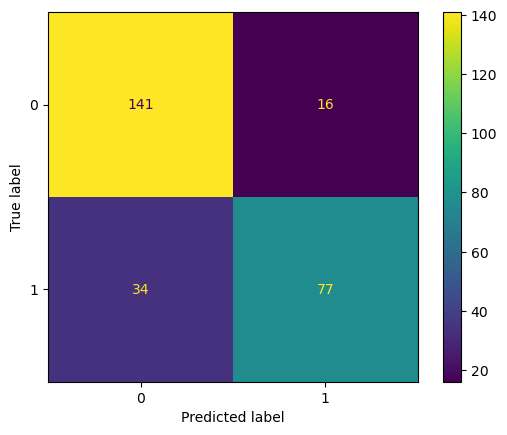

In [27]:
cfm = confusion_matrix(y_test, Y_pred) # ()
print(cfm)
disp = ConfusionMatrixDisplay(cfm)
disp.plot()
plt.show()

* con y_test

0.873013140529064


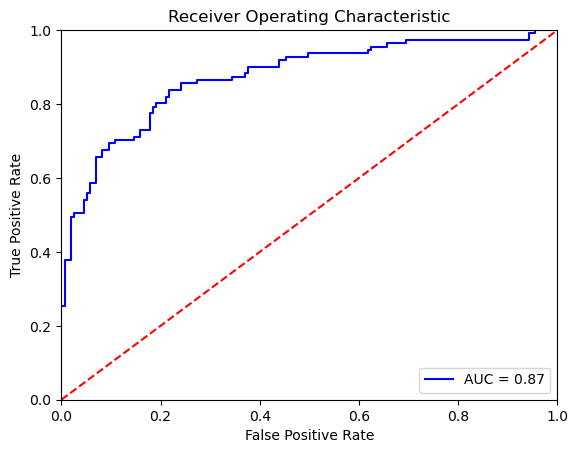

In [28]:
probs = clf.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* con y_train

0.8421017757752451


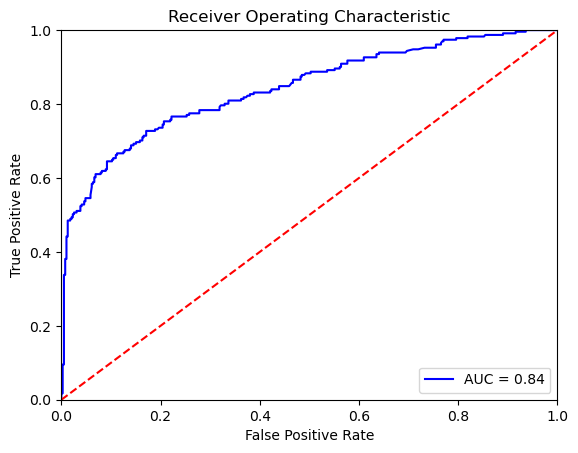

In [29]:
probs_train=clf.predict_proba(X_train) # calculamos las probabilidades (predicción)
fpr, tpr, threshold = metrics.roc_curve(y_train, probs_train[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# plot curve roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

* con y

In [30]:
# probs_train=clf.predict_proba(X) # calculamos las probabilidades (predicción)
# fpr, tpr, threshold = metrics.roc_curve(Y, probs_train[:,1])
# roc_auc = metrics.auc(fpr, tpr)
# print(roc_auc)
# # plot curve roc
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:

import statsmodels.api as sm

In [33]:
X_test = sm.add_constant(X_test)
logit_model = sm.Logit(y_test, X_test)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.399380
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  268
Model:                          Logit   Df Residuals:                      260
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 Jun 2024   Pseudo R-squ.:                  0.4112
Time:                        17:55:24   Log-Likelihood:                -107.03
converged:                       True   LL-Null:                       -181.80
Covariance Type:            nonrobust   LLR p-value:                 5.109e-29
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8540      0.980      5.972      0.000       3.933       7.775
Age           -0.0570      0.